# Explore here

In [3]:
import torch
import gc

In [46]:
torch.cuda.empty_cache() # Limpiar cache gpu
gc.collect()

62106

In [5]:
import sys
print(sys.executable)

c:\Users\samue\anaconda3\envs\GPU2\python.exe


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds


setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

#Descargar el set de datos de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

c:\Users\samue\anaconda3\envs\GPU2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import tensorflow as tf
from tensorflow.python.client import device_lib

def print_info():
    print('TensorFlow Version: {}'.format(tf.__version__))
    print('GPU: {}'.format([x.physical_device_desc for x in device_lib.list_local_devices() if x.device_type == 'GPU']))
    print('CUDA Version: {}'.format(tf.sysconfig.get_build_info()['cuda_version']))
    print('cuDNN Version: {}\n'.format(tf.sysconfig.get_build_info()['cudnn_version']))

print_info()

TensorFlow Version: 2.10.0
GPU: ['device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9']
CUDA Version: 64_112
cuDNN Version: 64_8



In [8]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\samue\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell

In [9]:
datos

{'train': <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

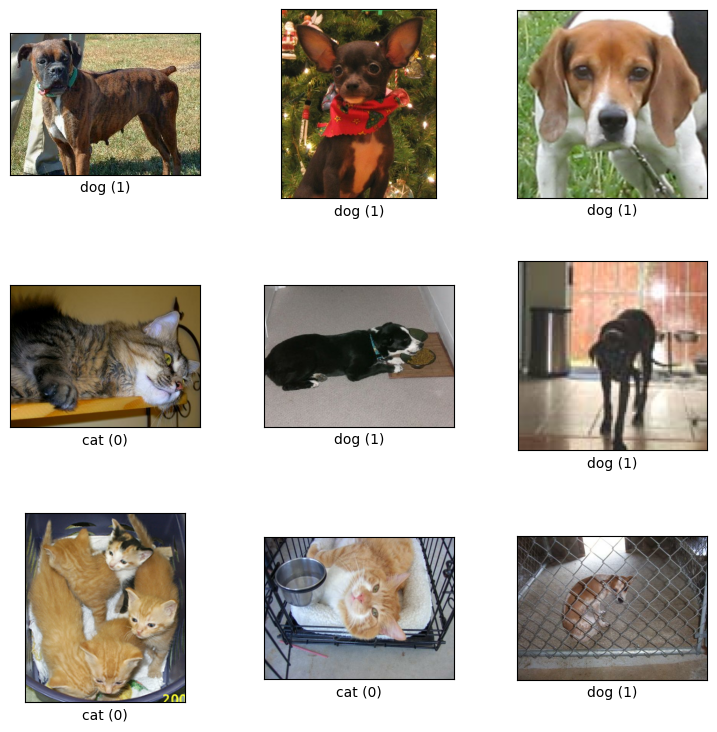

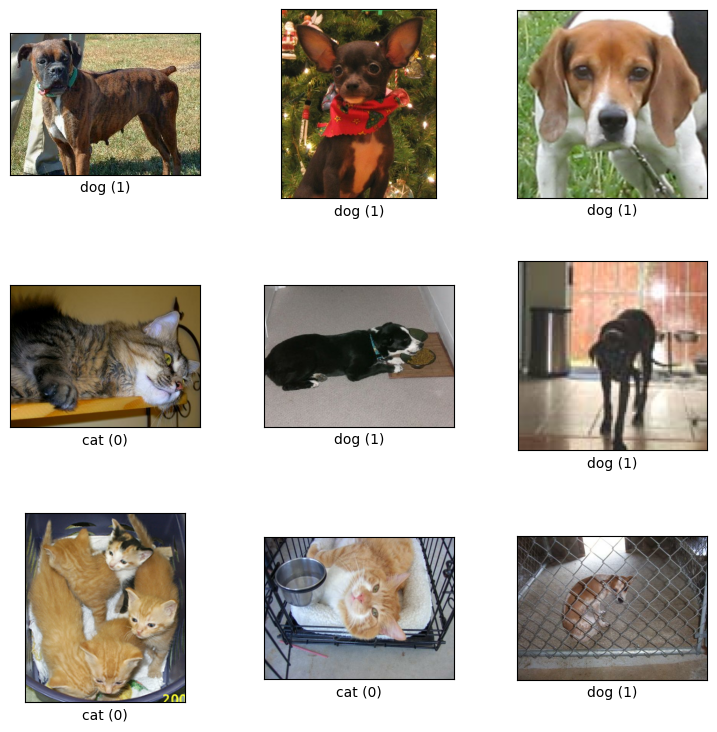

In [32]:
import matplotlib.pyplot as plt

tfds.show_examples(datos['train'], metadatos)

In [11]:
import cv2
import os
import numpy as np


# definimos img size que queremos y creamos la lista vacía para los datos de entrenamiento
img_size = 200
datos_train = []

for i, (image, tag) in enumerate(datos['train']):
    # con cv2 cambiamos el tamaño de imagen
    image = cv2.resize(image.numpy(), (img_size, img_size))
    # las ponemos en escala de grises para procesarlas
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # las guardamos en la lista de entrenamiento
    datos_train.append([image, tag])

datos_train[0]

[array([[246, 239, 217, ..., 179, 162, 133],
        [242, 236, 197, ..., 170, 169, 162],
        [239, 226, 169, ..., 146, 167, 168],
        ...,
        [159, 169, 131, ..., 189, 130, 119],
        [120, 142, 128, ...,  78, 104,  58],
        [101, 126, 131, ...,  49,  62,  48]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [12]:
# hacemos el split manual
X = []
y = []

for image, tag in datos_train:
    X.append(image)
    y.append(tag)

X[0]

array([[246, 239, 217, ..., 179, 162, 133],
       [242, 236, 197, ..., 170, 169, 162],
       [239, 226, 169, ..., 146, 167, 168],
       ...,
       [159, 169, 131, ..., 189, 130, 119],
       [120, 142, 128, ...,  78, 104,  58],
       [101, 126, 131, ...,  49,  62,  48]], dtype=uint8)

In [13]:
# normalizar los datos 
Xnorm = np.array(X).astype(float) / 255
Xnorm[0]

array([[0.96470588, 0.9372549 , 0.85098039, ..., 0.70196078, 0.63529412,
        0.52156863],
       [0.94901961, 0.9254902 , 0.77254902, ..., 0.66666667, 0.6627451 ,
        0.63529412],
       [0.9372549 , 0.88627451, 0.6627451 , ..., 0.57254902, 0.65490196,
        0.65882353],
       ...,
       [0.62352941, 0.6627451 , 0.51372549, ..., 0.74117647, 0.50980392,
        0.46666667],
       [0.47058824, 0.55686275, 0.50196078, ..., 0.30588235, 0.40784314,
        0.22745098],
       [0.39607843, 0.49411765, 0.51372549, ..., 0.19215686, 0.24313725,
        0.18823529]])

In [14]:
ynorm = np.array(y)
ynorm


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

#### Creando el modelo

In [15]:
# modelo_chiclanero = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(200, 200, 1)),
#     tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [16]:
# modelo_chiclanero.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [17]:
# modelo_chiclanero.fit(Xnorm, ynorm, 
#                       batch_size=32, # catnidad de imagenes por lote 
#                       validation_split=0.2, # %de split para la validation
#                       epochs=50 # vueltas que da el modelo para ajustar el loss y accuracy
#                       )

In [18]:
# nota: los modelos densos son una puta mierda

In [19]:
modelo_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(), # Aplanar a una sola secuencia 1d
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [20]:
modelo_cnn.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [22]:
modelo_cnn.fit(Xnorm, ynorm, 
               batch_size=32, 
               validation_split=0.2,
               epochs=50,
               callbacks=[early_stopping]
               )


Epoch 1/50
582/582 [==============================] - 34s 43ms/step - loss: 0.6484 - accuracy: 0.6140 - val_loss: 0.5684 - val_accuracy: 0.7017
Epoch 2/50
582/582 [==============================] - 22s 38ms/step - loss: 0.5115 - accuracy: 0.7483 - val_loss: 0.4841 - val_accuracy: 0.7662
Epoch 3/50
582/582 [==============================] - 22s 38ms/step - loss: 0.4291 - accuracy: 0.8017 - val_loss: 0.4373 - val_accuracy: 0.7937
Epoch 4/50
582/582 [==============================] - 22s 38ms/step - loss: 0.3703 - accuracy: 0.8327 - val_loss: 0.4540 - val_accuracy: 0.7973
Epoch 5/50
582/582 [==============================] - 22s 38ms/step - loss: 0.3013 - accuracy: 0.8702 - val_loss: 0.4406 - val_accuracy: 0.8072
Epoch 6/50
582/582 [==============================] - 22s 38ms/step - loss: 0.2232 - accuracy: 0.9087 - val_loss: 0.4920 - val_accuracy: 0.8160
Epoch 7/50
582/582 [==============================] - 22s 38ms/step - loss: 0.1520 - accuracy: 0.9400 - val_loss: 0.6151 - val_accuracy:

### el modelo de arriba está mal porque a medida que suben las epocas, la val_loss empieza a crecer y a bajar la precisión

-->> indicio claro de overfitting

#### Vemos el droupout

In [23]:
#! DROPOUT 
# para que no procrastinen las neuronas del modelo
# --> tf.keras.layers.Dropout(0.5)
# se puede poner al principio de las capas (afecta a todas)
# o entre capas (afecta a la anterior)

modelo_cnn_dropout = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #? dropout --> corta conexiones (mejora tiempo sin perder calidad)
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


In [24]:
modelo_cnn_dropout.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [29]:
modelo_cnn_dropout.fit(Xnorm, ynorm, 
                      batch_size=32, # catnidad de imagenes por lote 
                      validation_split=0.2, # %de split para la validation
                      epochs=50 # vueltas que da el modelo para ajustar el loss y accuracy
                      )

Epoch 1/50
582/582 [==============================] - 26s 43ms/step - loss: 0.6276 - accuracy: 0.6484 - val_loss: 0.5854 - val_accuracy: 0.6931
Epoch 2/50
582/582 [==============================] - 22s 38ms/step - loss: 0.4882 - accuracy: 0.7657 - val_loss: 0.4716 - val_accuracy: 0.7694
Epoch 3/50
582/582 [==============================] - 22s 38ms/step - loss: 0.4014 - accuracy: 0.8192 - val_loss: 0.4386 - val_accuracy: 0.7945
Epoch 4/50
582/582 [==============================] - 22s 38ms/step - loss: 0.3282 - accuracy: 0.8544 - val_loss: 0.4489 - val_accuracy: 0.7980
Epoch 5/50
582/582 [==============================] - 22s 38ms/step - loss: 0.2275 - accuracy: 0.9067 - val_loss: 0.4871 - val_accuracy: 0.7943
Epoch 6/50
582/582 [==============================] - 22s 38ms/step - loss: 0.1406 - accuracy: 0.9456 - val_loss: 0.5632 - val_accuracy: 0.7952
Epoch 7/50
259/582 [============>.................] - ETA: 11s - loss: 0.0748 - accuracy: 0.9750

KeyboardInterrupt: 

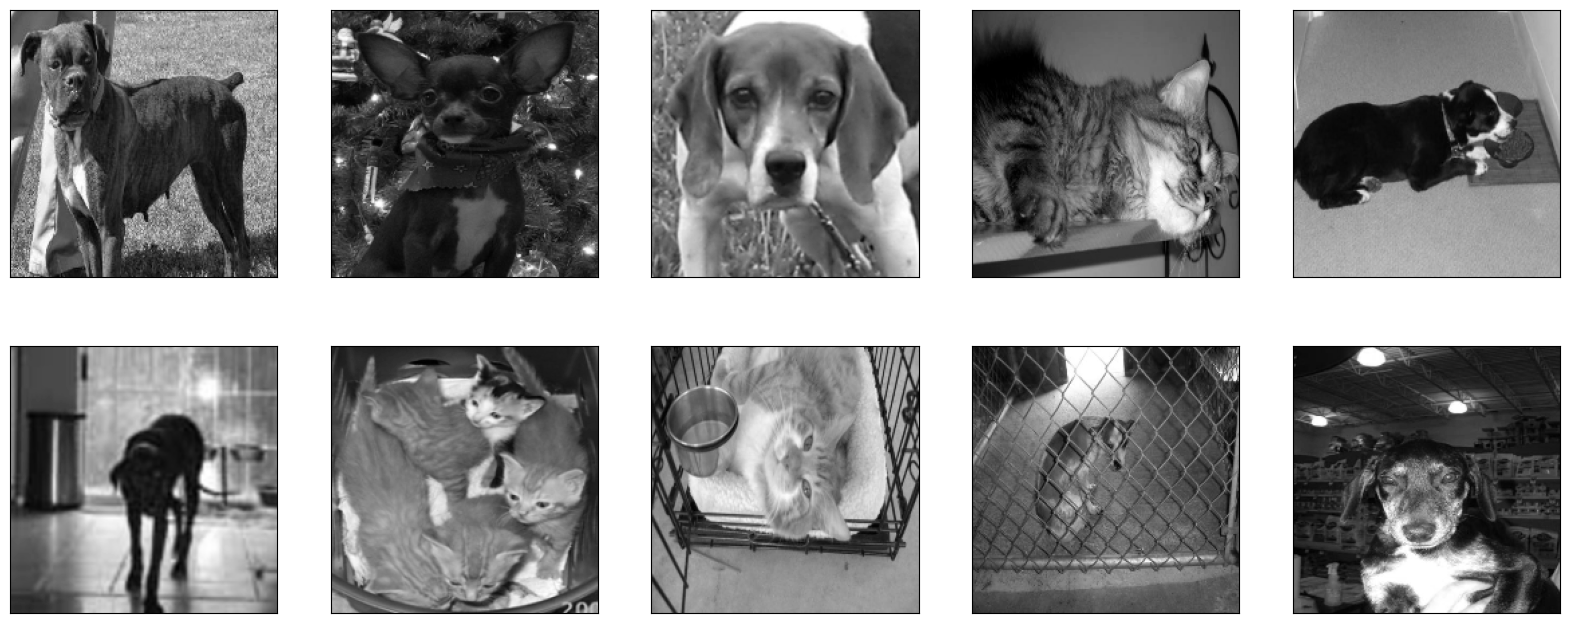

In [45]:
plt.figure(figsize=(20, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Xnorm[i].reshape(200, 200), cmap = 'gray')

### Data augmentation

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(Xnorm)
plt.figure(figsize=(20,8))
for imagen, etiqueta in datagen.flow(Xnorm, ynorm, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (23262, 200, 200)